In [1]:
from bigdl.util.common import *
from image import *
import cv2
import numpy as np
from IPython.display import Image, display
JavaCreator.set_creator_class("com.intel.analytics.zoo.transform.vision.pythonapi.PythonVisionTransform")
init_engine()

## Utils to read and display image

In [2]:
path = '/home/jxy/data/testdata/test/000019.jpg'
    
def transform_display(transformer, image_frame):
    out = transformer(image_frame)
    cv2.imwrite('/tmp/tmp.jpg', out.get_image(to_chw=False)[0])
    display(Image(filename='/tmp/tmp.jpg'))

## ColorJitter

creating: createColorJitter


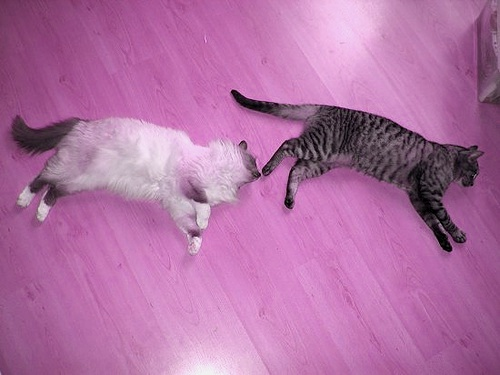

In [3]:
image_frame = ImageFrame.read(path)
color = ColorJitter(random_order_prob=1.0, shuffle=True)
transform_display(color, image_frame)

## Resize

creating: createResize


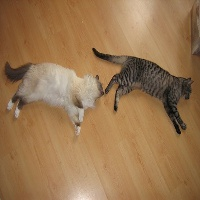

In [4]:
image_frame = ImageFrame.read(path)
resize = Resize(200, 200, 1)
transform_display(resize, image_frame)

## Crop

creating: createFixedCrop


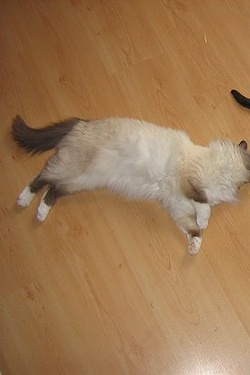

creating: createFixedCrop


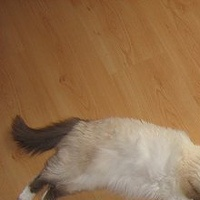

In [5]:
# Normalized Roi
image_frame = ImageFrame.read(path)
crop = FixedCrop(0.0, 0.0, 0.5, 1.0)
transform_display(crop, image_frame)

# Non-normalized Roi
images = ImageFrame.read(path)
crop = FixedCrop(0.0, 0.0, 200.0, 200., False)
transform_display(crop, image_frame)

## CenterCrop

creating: createCenterCrop


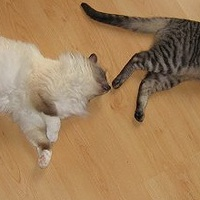

In [6]:
image_frame = ImageFrame.read(path)
crop = CenterCrop(200, 200)
transform_display(crop, image_frame)

## Random Crop

creating: createRandomCrop


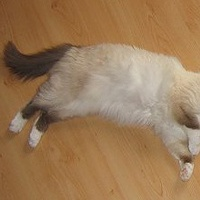

In [7]:
image_frame = ImageFrame.read(path)
crop = RandomCrop(200, 200)
transform_display(crop, image_frame)

## Expand

creating: createExpand


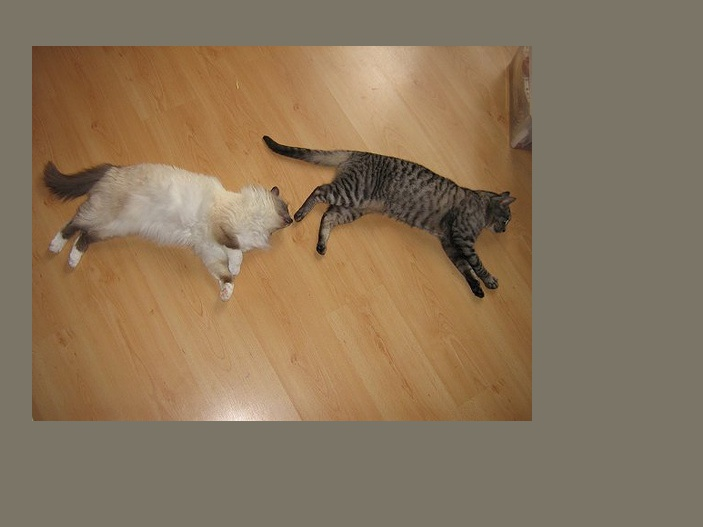

In [8]:
image_frame = ImageFrame.read(path)
expand = Expand(means_r=123, means_g=117, means_b=104,
                 max_expand_ratio=2.0)
transform_display(expand, image_frame)

## Horizontal Flip

creating: createHFlip


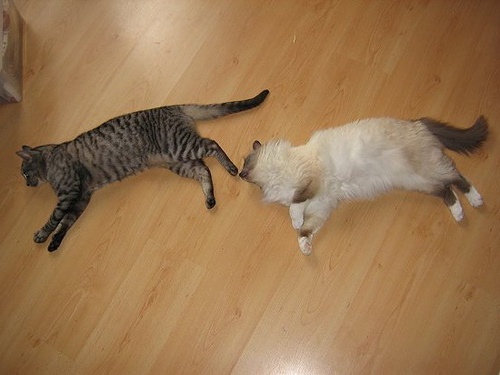

In [9]:
image_frame = ImageFrame.read(path)
transformer = HFlip()
transform_display(transformer, image_frame)

## Create a pipeline of transformer
Apply pipeline to image feature

creating: createColorJitter
creating: createHFlip
creating: createResize
creating: createPipeline


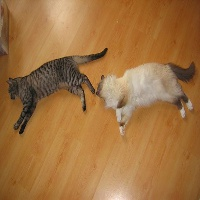

In [10]:
transformer = Pipeline([ColorJitter(), HFlip(), Resize(200, 200, 1)])
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

## Random transformer with probability 0.5

creating: createHFlip
creating: createRandomTransformer


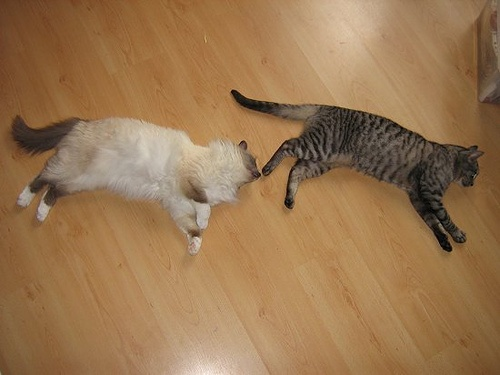

In [11]:
transformer = RandomTransformer(HFlip(), 0.5)
image_frame = ImageFrame.read(path)
transform_display(transformer, image_frame)

## ImageFeature to_sample, get_image, get_label

In [12]:
image_frame = ImageFrame.read(path)
print image_frame
print image_frame.to_sample()
print image_frame.get_image()
print image_frame.get_label()

com.intel.analytics.zoo.transform.vision.image.LocalImageFrame@71e92da3
[Sample: features: [JTensor: storage: [  33.   32.   34. ...,  107.  107.  108.], shape: [  3 375 500], float], label: JTensor: storage: [-1.], shape: [1], float]
[array([[[  33.,   32.,   34., ...,   79.,   79.,   80.],
        [  33.,   32.,   34., ...,   78.,   79.,   82.],
        [  34.,   33.,   34., ...,   78.,   78.,   81.],
        ..., 
        [  82.,   47.,   43., ...,   42.,   42.,   42.],
        [ 102.,   58.,   46., ...,   43.,   43.,   43.],
        [ 112.,   66.,   48., ...,   41.,   41.,   42.]],

       [[  56.,   55.,   57., ...,  102.,   99.,  100.],
        [  56.,   55.,   57., ...,  100.,   99.,  102.],
        [  57.,   56.,   57., ...,  100.,   98.,  101.],
        ..., 
        [ 115.,   79.,   74., ...,   75.,   75.,   75.],
        [ 133.,   91.,   77., ...,   76.,   76.,   76.],
        [ 144.,   97.,   79., ...,   74.,   74.,   75.]],

       [[  94.,   93.,   95., ...,  118.,  117.,

In [13]:
folder = "/home/jxy/data/testdata/test"

transformer = Pipeline([ColorJitter(), HFlip(), Resize(200, 200, 1), MatToFloats()])

image_frame = ImageFrame.read(folder, sc)

# apply transformer to image_frame
image_frame = transformer(image_frame)

print type(image_frame.value)
print image_frame.is_distributed()

# image_frame to sample
sample_rdd = image_frame.to_sample()
print sample_rdd.take(1)

# get label rdd
label_rdd = image_frame.get_label()
print 'label ', label_rdd.take(1)

# get image rdd
image_rdd = image_frame.get_image()
print image_rdd.take(1)

creating: createColorJitter
creating: createHFlip
creating: createResize
creating: createMatToFloats
creating: createPipeline
<class 'py4j.java_gateway.JavaObject'>
True
[Sample: features: [JTensor: storage: [ 101.   97.   50. ...,    0.    0.    0.], shape: [  3 200 200], float], label: JTensor: storage: [-1.], shape: [1], float]
label  [array([-1.], dtype=float32)]
[array([[[ 52.,  49.,  18., ...,  25.,  22.,  20.],
        [ 52.,  53.,  22., ...,  26.,  22.,  18.],
        [ 52.,  56.,  24., ...,  29.,  31.,  21.],
        ..., 
        [ 46.,  45.,  52., ...,   0.,   0.,   0.],
        [ 34.,  50.,  48., ...,   0.,   0.,   0.],
        [ 37.,  45.,  42., ...,   0.,   0.,   0.]],

       [[ 52.,  49.,  18., ...,  25.,  22.,  20.],
        [ 52.,  53.,  22., ...,  26.,  22.,  18.],
        [ 52.,  56.,  24., ...,  29.,  31.,  21.],
        ..., 
        [ 46.,  45.,  52., ...,   0.,   0.,   0.],
        [ 34.,  50.,  48., ...,   0.,   0.,   0.],
        [ 37.,  45.,  42., ...,   0., 

In [14]:
folder = "/home/jxy/data/testdata/test"
image_frame = ImageFrame.read(folder, sc)

color = ColorJitter()
hflip = HFlip()
resize = Resize(200, 200, 1)
to_float = MatToFloats(200, 200)

image_frame = color(image_frame)
image_frame = hflip(image_frame)
image_frame = resize(image_frame)
image_frame = image_frame.transform(to_float)
print type(image_frame)
sample = image_frame.to_sample() 
print sample.count()

creating: createColorJitter
creating: createHFlip
creating: createResize
creating: createMatToFloats
<class 'image.ImageFrame'>
6


In [15]:
folder = "/home/jxy/data/testdata/test"

transformer = Pipeline([ColorJitter(), HFlip(), Resize(200, 200, 1), MatToFloats()])

image_frame = ImageFrame.read(folder)

image_frame.transform(transformer)

# image_frame to sample
samples = image_frame.to_sample()
print samples[0]

# get label list
labels = image_frame.get_label()
print 'label ', labels[0]

# get image list
images = image_frame.get_image()
print images[0]

creating: createColorJitter
creating: createHFlip
creating: createResize
creating: createMatToFloats
creating: createPipeline
Sample: features: [JTensor: storage: [  8.   1.   2. ...,  18.  17.  14.], shape: [  3 200 200], float], label: JTensor: storage: [-1.], shape: [1], float,
label  [-1.]
[[[   8.    1.    2. ...,  237.  236.  237.]
  [   8.    1.    2. ...,  239.  235.  230.]
  [  12.    0.    3. ...,  236.  234.  231.]
  ..., 
  [   0.    0.    0. ...,   17.   18.   30.]
  [   0.    0.    0. ...,   16.   18.   19.]
  [   0.    0.    0. ...,   16.   16.   12.]]

 [[   4.    0.    0. ...,  219.  216.  215.]
  [   6.    1.    0. ...,  217.  216.  216.]
  [  10.    0.    0. ...,  217.  218.  216.]
  ..., 
  [   0.    0.    0. ...,   28.   22.   28.]
  [   0.    0.    0. ...,   33.   28.   28.]
  [   0.    0.    0. ...,   29.   25.   23.]]

 [[   4.    1.    0. ...,  215.  213.  213.]
  [   5.    2.    0. ...,  212.  211.  210.]
  [   9.    1.    0. ...,  212.  212.  210.]
  ..., 
  